In [1]:
import os

In [2]:
reports = os.listdir('../reports')
reports

['litsearch_top6_hybrid_report.json',
 'litsearch_top60_hybrid_report.json',
 'litsearch_top4_hybrid_report.json',
 'litsearch_top50_hybrid_report.json',
 'litsearch_top40_hybrid_report.json',
 'litsearch_top3_hybrid_report.json',
 'litsearch_top30_hybrid_report.json',
 'litsearch_top9_hybrid_report.json',
 'litsearch_top2_hybrid_report.json',
 'litsearch_top7_hybrid_report.json',
 'litsearch_top20_hybrid_report.json',
 'litsearch_top10_hybrid_report.json',
 'litsearch_top80_hybrid_report.json',
 'litsearch_top5_hybrid_report.json',
 'litsearch_top90_hybrid_report.json',
 'litsearch_top8_hybrid_report.json',
 'litsearch_top100_hybrid_report.json',
 'litsearch_hybrid_report.json',
 'litsearch_top70_hybrid_report.json',
 'litsearch_top1_hybrid_report.json']

In [3]:
import re
def get_rep_num(report):
    match = re.search(r'litsearch_top(\d+)_hybrid_report\.json', report)
    if match:
        return int(match.group(1))  # return as integer
    else:
        return None

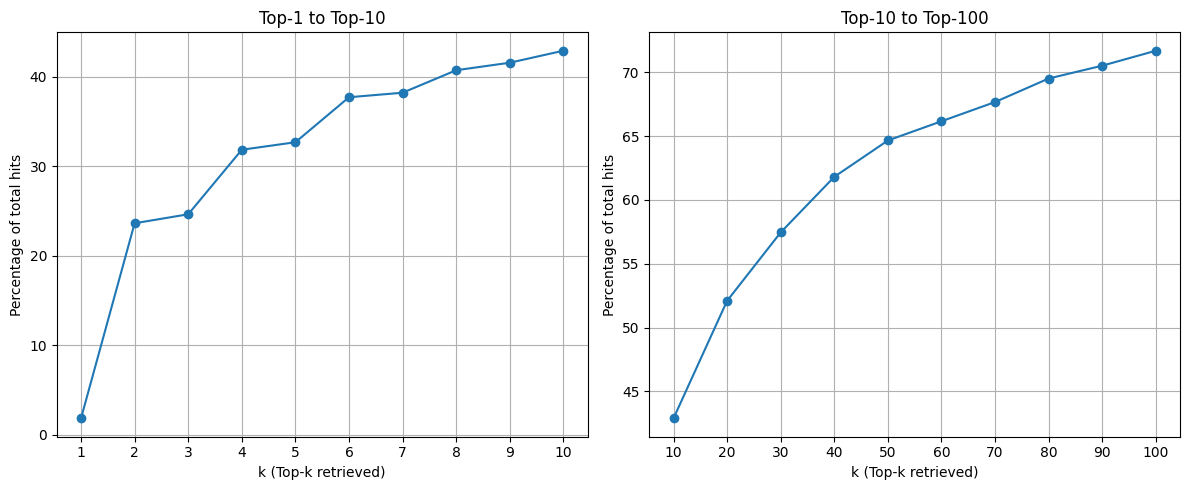

In [9]:
import json
import os
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

def plot_range(lst, reports, ax: Axes):
    X = []
    Y = []
    TOTAL = None
    for report in reports:
        rep_num = get_rep_num(report)
        if rep_num not in lst:
            continue

        X.append(rep_num)
        with open(os.path.join('../reports', report), 'r') as f:
            data = json.load(f)
            hits = data['hits']
            Y.append(hits)
            TOTAL = data['total']

    if not X or not Y:
        return  # nothing to plot

    sorted_pairs = sorted(zip(X, Y))
    X, Y = zip(*sorted_pairs)
    Y = [y / TOTAL * 100 for y in Y]

    ax.plot(X, Y, marker='o')
    ax.set_xlabel('k (Top-k retrieved)')
    ax.set_ylabel('Percentage of total hits')
    ax.set_xticks(X)
    ax.grid(True)

# --- Create combined figure ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

plot_range(range(1, 11), reports, axes[0])
axes[0].set_title('Top-1 to Top-10')

plot_range(range(10, 101, 10), reports, axes[1])
axes[1].set_title('Top-10 to Top-100')

plt.tight_layout()
fig.savefig("litsearch.svg", format="svg")  # Save as SVG
plt.show()
